In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


questions:


0) Are data scientists happier with their job than others?

1) what are the most important Frameworks, Libraries, and Tools data scientists use?

2) do data scientist have more healthy habits than other programmers?

3) do data scientists who contribute to open source have a higher salary than others? 

In [4]:
cd gdrive/My\ Drive/data_science

/content/gdrive/My Drive/data_science


In [81]:
import pandas as pd
import re as _re
import seaborn as _sns
import numpy as _np
from scipy.stats import levene
from scipy.stats import ttest_ind

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

In [0]:
df['is_data_scientist'] = df["DevType"].str.contains("Data scientist or machine learning specialist")

In [37]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,is_data_scientist
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,NaN
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,False
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never,H

# 1) How is it easiest to break into the field?

## Method:




In [0]:
# Take a look at subset of data consisting of individuals adding `Data scientist or machine learning specialist` as `DevType` 

ds_df = df.query("is_data_scientist == True").copy()

In [39]:
print("How many individuals say they are `Data scientist or machine learning specialist`?\n")

print(
    f"Out of {len(df)} respondents, {len(ds_df)} say they are `Data scientist "
    f"or machine learning specialist`.\n"
    f"This is a share of {len(ds_df)/len(df):.1%}"
    )

How many individuals say they are `Data scientist or machine learning specialist`?

Out of 88883 respondents, 6460 say they are `Data scientist or machine learning specialist`.
This is a share of 7.3%


In [40]:
ds_df["individual_dev_types"] = ds_df["DevType"].str.split(";")
ds_df["individual_dev_types"].head()

5     [Data or business analyst, Data scientist or m...
9     [Data or business analyst, Data scientist or m...
11    [Data or business analyst, Data scientist or m...
32    [Academic researcher, Data scientist or machin...
61    [Data or business analyst, Data scientist or m...
Name: individual_dev_types, dtype: object

In [41]:
tmp = ds_df["individual_dev_types"].apply(pd.Series).stack()
other_dev_types = tmp.value_counts()[1:].to_frame().rename(columns={0: 'cnt'})
other_dev_types["share"] = other_dev_types["cnt"] / other_dev_types["cnt"].sum()
other_dev_types.head()

,cnt,share
"Developer, back-end",3075,0.116698
"Developer, full-stack",2445,0.092789
Data or business analyst,2079,0.078899
Academic researcher,1874,0.071120
"Engineer, data",1872,0.071044


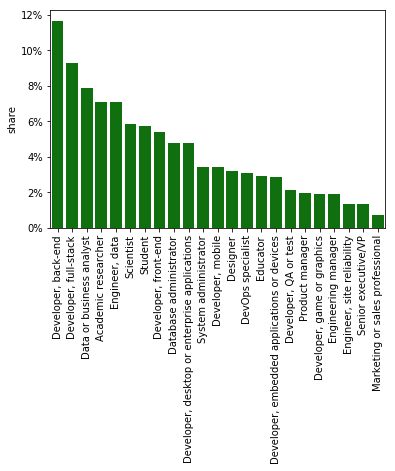

In [44]:
plot_args = {
    'x': other_dev_types.index,
    'y': other_dev_types["share"],
    'color': 'g'
}
ax = _sns.barplot(**plot_args)
ax.set_xticklabels(labels=plot_args['x'], rotation=90);
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(y_val) for y_val in vals]);

# Are data scientists happier with their job than others?

In [45]:
ds_df.columns.tolist()

['Respondent',
 'MainBranch',
 'Hobbyist',
 'OpenSourcer',
 'OpenSource',
 'Employment',
 'Country',
 'Student',
 'EdLevel',
 'UndergradMajor',
 'EduOther',
 'OrgSize',
 'DevType',
 'YearsCode',
 'Age1stCode',
 'YearsCodePro',
 'CareerSat',
 'JobSat',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'JobSeek',
 'LastHireDate',
 'LastInt',
 'FizzBuzz',
 'JobFactors',
 'ResumeUpdate',
 'CurrencySymbol',
 'CurrencyDesc',
 'CompTotal',
 'CompFreq',
 'ConvertedComp',
 'WorkWeekHrs',
 'WorkPlan',
 'WorkChallenge',
 'WorkRemote',
 'WorkLoc',
 'ImpSyn',
 'CodeRev',
 'CodeRevHrs',
 'UnitTests',
 'PurchaseHow',
 'PurchaseWhat',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'WebFrameWorkedWith',
 'WebFrameDesireNextYear',
 'MiscTechWorkedWith',
 'MiscTechDesireNextYear',
 'DevEnviron',
 'OpSys',
 'Containers',
 'BlockchainOrg',
 'BlockchainIs',
 'BetterLife',
 'ITperson',
 'OffOn',
 'SocialMedia',
 'Ext

In [46]:
ds_df['JobSat'].unique()

array(['Slightly satisfied', 'Slightly dissatisfied', nan,
       'Very satisfied', 'Neither satisfied nor dissatisfied',
       'Very dissatisfied'], dtype=object)

In [47]:
cat survey_results_schema.csv | grep JobSat

JobSat,"How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)"


In [0]:
job_satisfaction_mapping = {
    'Very dissatisfied': 0,
    'Slightly dissatisfied': 1,
    'Neither satisfied nor dissatisfied': 2,    
    'Slightly satisfied': 3, 
    'Very satisfied': 4,
 }

In [0]:
df['JobSatNumeric'] = df['JobSat'].map(job_satisfaction_mapping, na_action='ignore')

In [0]:
t_test_stats = df.groupby('is_data_scientist')['JobSatNumeric'].agg(['mean', 'std'])
t_test_stats

In [67]:
ref = df.query('is_data_scientist == False')['JobSatNumeric'].dropna()
ref = df.query('is_data_scientist == True')['JobSatNumeric'].dropna()

# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
levene(ref, test)
# test not significant, therefor equal variances can be assumed

LeveneResult(statistic=0.08025472144461068, pvalue=0.7769634225641581)

In [0]:
statistic, two_sided_pvalue = ttest_ind(a=ref, b=test, axis=0, equal_var=True)

In [0]:
# half the p-value as t-test is performing a two-sided test and we have a one-sided hypothesis
one_sided_pvalue = two_sided_pvalue / 2

In [80]:
print(f"The test is not significant on a confidence level of 95%, the p-value is: {one_sided_pvalue:.2f}")

The test is not significant on a confidence level of 95%, the p-value is: 0.19
